# Reconocimiento de las señales de tráfico

In [1]:
import tensorflow as tf
import os

import numpy as np
import matplotlib.image as imd



In [2]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    print(dirs)
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
    #print(label_dir)
    #print(file_names)
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [3]:
load_ml_data("../datasets/belgian/Training/")

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


([array([[[210, 249, 232],
          [204, 249, 208],
          [197, 198, 155],
          ...,
          [ 51,  60,  40],
          [ 54,  64,  44],
          [ 57,  66,  46]],
  
         [[209, 250, 236],
          [212, 255, 217],
          [200, 196, 156],
          ...,
          [ 49,  57,  38],
          [ 51,  59,  41],
          [ 53,  60,  42]],
  
         [[203, 246, 236],
          [207, 246, 213],
          [202, 192, 156],
          ...,
          [ 47,  53,  35],
          [ 48,  54,  36],
          [ 48,  55,  37]],
  
         ...,
  
         [[  2,  22,  25],
          [ 26,  56,  77],
          [ 71, 140, 159],
          ...,
          [ 84,  77,  50],
          [ 68,  66,  41],
          [ 56,  64,  44]],
  
         [[  0,  22,  32],
          [ 30,  75, 106],
          [ 87, 176, 198],
          ...,
          [ 86,  80,  52],
          [ 68,  66,  41],
          [ 55,  63,  42]],
  
         [[  0,  32,  50],
          [ 42, 101, 135],
          [121, 217, 239

In [4]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [5]:
images, labels = load_ml_data(train_data_dir)

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']


In [6]:
len(images)

4575

In [7]:
len(labels)

4575

In [8]:
images = np.array(images) # convirtiendo las listas a arrays

In [9]:
labels = np.array(labels)

In [10]:
images.ndim # dimensión 

1

In [11]:
images.size # cuántas columnas y filas hay 

4575

In [12]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [13]:
len(images[0])

141

In [14]:
labels.ndim

1

In [15]:
labels.size

4575

In [16]:
len(set(labels))

62

In [17]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [18]:
images.itemsize

8

In [19]:
images.nbytes

36600

In [20]:
images.nbytes/images.itemsize

4575.0

In [21]:
import matplotlib.pyplot as plt

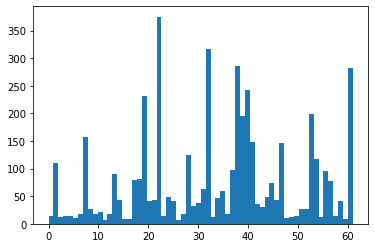

In [22]:
plt.hist(labels, len(set(labels)))
plt.show()

In [23]:
import random

In [24]:
rand_signs = random.sample(range(0, len(labels)), 6) # 6 señales aleatorias 
rand_signs

[3797, 1281, 3800, 3648, 685, 1178]

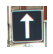

Forma:(130, 127, 3), min:10, max:255


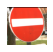

Forma:(440, 457, 3), min:0, max:255


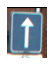

Forma:(94, 73, 3), min:0, max:255


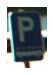

Forma:(99, 64, 3), min:0, max:255


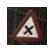

Forma:(130, 136, 3), min:9, max:244


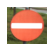

Forma:(166, 177, 3), min:11, max:255


In [25]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]] # imagen temporal 
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

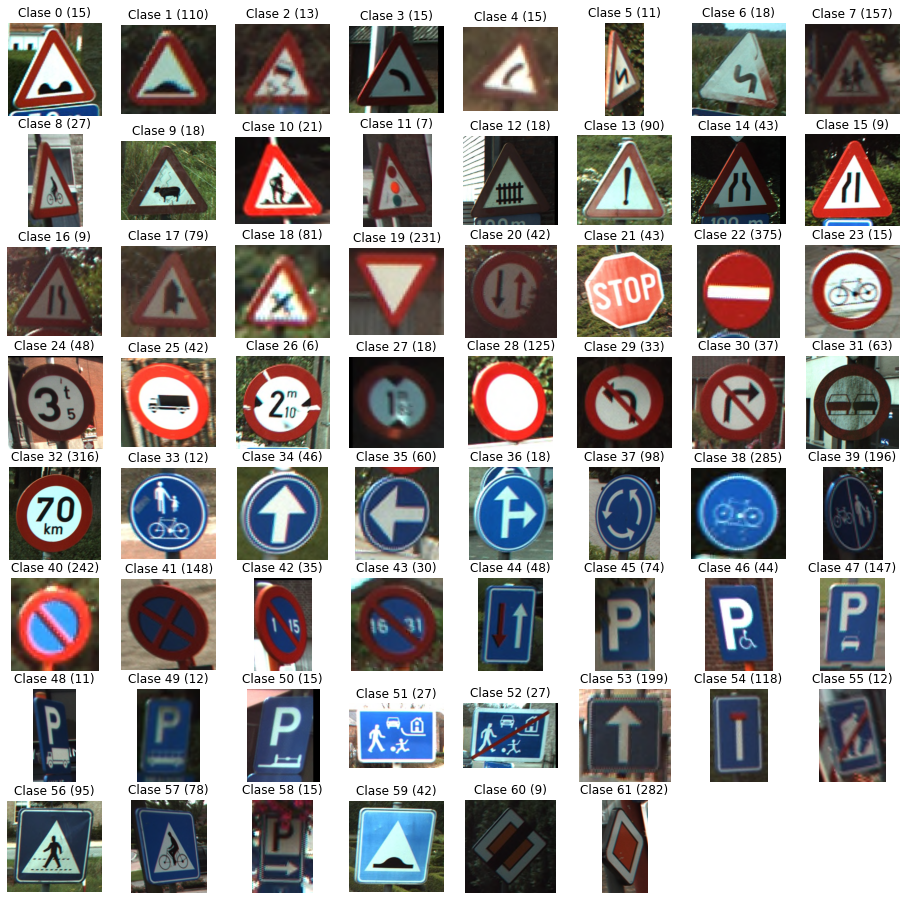

In [26]:
unique_labels = set(labels)
plt.figure(figsize=(16,16)) # figura para englobarlas a todas 
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)] # nos quedamos con el valor de la posición del índice de la etiqueta y con ella consultamos la imagen 
    plt.subplot(8,8, i) # matriz de 8 por 8
    plt.axis("off") # evitar ejes de coordenadas 
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label))) # añadir título # formatear etiqueta # clase / números de imágenes que hay
    i +=1
    plt.imshow(temp_im)
plt.show()

In [27]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [28]:
from skimage import transform # puede redimensionar el tamaño de cada imagen 

In [29]:
images[0].shape

(141, 142, 3)

In [30]:
images[1].shape

(120, 123, 3)

In [31]:
images[2].shape

(105, 107, 3)

In [32]:
w = 9999 #weight
h = 9999 # height
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [35]:
#doy tamaño 30x30 a todas las imagenes de la carpeta de entrenamiento. las mas pequeñas las hara mas grandes
X_img_train30 = [transform.resize(image,(30,30)) for image in images]
X_img_train30[0]#los valores cambiaron --> ahora tiene 900 pixeles

array([[[0.72005229, 0.70687582, 0.57784314],
        [0.52505882, 0.40976471, 0.28803922],
        [0.52320261, 0.39620915, 0.28581699],
        ...,
        [0.19869281, 0.22895425, 0.15163399],
        [0.18466667, 0.21152941, 0.14058824],
        [0.18534641, 0.21228758, 0.14169935]],

       [[0.69623529, 0.65879739, 0.53219608],
        [0.49666667, 0.34654902, 0.23752941],
        [0.46705882, 0.32098039, 0.22104575],
        ...,
        [0.18607843, 0.22137255, 0.14294118],
        [0.18980392, 0.22901961, 0.1545098 ],
        [0.19847059, 0.22721569, 0.15901961]],

       [[0.68928105, 0.67254902, 0.53823529],
        [0.50666667, 0.43901961, 0.32901961],
        [0.47941176, 0.40849673, 0.30392157],
        ...,
        [0.18496732, 0.20588235, 0.13333333],
        [0.18823529, 0.22019608, 0.14627451],
        [0.19267974, 0.22366013, 0.15601307]],

       ...,

       [[0.0903268 , 0.12071895, 0.04843137],
        [0.07627451, 0.11058824, 0.0672549 ],
        [0.14052288, 0

In [ ]:

#revisamos nuevamente el tamaño, ahora con el cambio aplicado
rand_signs = random.sample(range(0, len(Y_lbl_train)), 6)#genero aleatorio
data_random(rand_signs,X_img_train30)

In [49]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [50]:
images30[0]

array([[[0.72005229, 0.70687582, 0.57784314],
        [0.52505882, 0.40976471, 0.28803922],
        [0.52320261, 0.39620915, 0.28581699],
        ...,
        [0.19869281, 0.22895425, 0.15163399],
        [0.18466667, 0.21152941, 0.14058824],
        [0.18534641, 0.21228758, 0.14169935]],

       [[0.69623529, 0.65879739, 0.53219608],
        [0.49666667, 0.34654902, 0.23752941],
        [0.46705882, 0.32098039, 0.22104575],
        ...,
        [0.18607843, 0.22137255, 0.14294118],
        [0.18980392, 0.22901961, 0.1545098 ],
        [0.19847059, 0.22721569, 0.15901961]],

       [[0.68928105, 0.67254902, 0.53823529],
        [0.50666667, 0.43901961, 0.32901961],
        [0.47941176, 0.40849673, 0.30392157],
        ...,
        [0.18496732, 0.20588235, 0.13333333],
        [0.18823529, 0.22019608, 0.14627451],
        [0.19267974, 0.22366013, 0.15601307]],

       ...,

       [[0.0903268 , 0.12071895, 0.04843137],
        [0.07627451, 0.11058824, 0.0672549 ],
        [0.14052288, 0

In [51]:
images30[0].shape

(30, 30, 3)

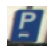

Forma:(30, 30, 3), min:0.10560348583878007, max:0.9882875816993464


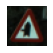

Forma:(30, 30, 3), min:0.012049019607843162, max:0.8


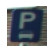

Forma:(30, 30, 3), min:0.06666666666666674, max:0.996078431372549


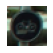

Forma:(30, 30, 3), min:0.022450980392155893, max:0.9329411764705879


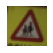

Forma:(30, 30, 3), min:0.04389978213507645, max:0.5447712418300652


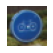

Forma:(30, 30, 3), min:0.062127450980392115, max:0.7881633986928105


In [52]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [53]:
from skimage.color import rgb2gray

In [54]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

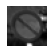

Forma:(30, 30), min:0.08384268627450978, max:0.9881262222222227


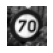

Forma:(30, 30), min:0.09606723856209178, max:0.7284220163398692


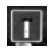

Forma:(30, 30), min:0.1482147450980393, max:0.9647962320261438


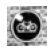

Forma:(30, 30), min:0.28032143137254906, max:0.9937911869281045


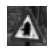

Forma:(30, 30), min:0.02903294640522881, max:0.5061900915032677


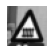

Forma:(30, 30), min:0.07517758169934613, max:0.5560244583877995


In [55]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [56]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [36]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [37]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [38]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [39]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [32]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  37.650494
EPOCH 50
Eficacia:  35.907978
EPOCH 100
Eficacia:  35.659233
EPOCH 150
Eficacia:  35.29814
EPOCH 200
Eficacia:  35.14011
EPOCH 250
Eficacia:  35.06142
EPOCH 300
Eficacia:  34.930275
EPOCH 350
Eficacia:  34.835846
EPOCH 400
Eficacia:  34.6988
EPOCH 450
Eficacia:  34.59825
EPOCH 500
Eficacia:  34.495518
EPOCH 550
Eficacia:  34.460327
EPOCH 600
Eficacia:  34.397377


# Evaluación de la red neuronal

In [41]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [42]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [43]:
prediction

array([37, 22, 22,  0, 32, 56, 47, 35, 40, 22, 38, 38,  1, 34, 56, 32, 32,
        7, 28, 61, 38, 39, 61, 37, 47, 61, 32, 38, 32, 41, 32, 39, 32, 31,
       47, 28, 40, 47, 57, 54])

In [44]:
sample_labels

[37,
 22,
 22,
 19,
 32,
 56,
 47,
 35,
 40,
 22,
 38,
 38,
 4,
 34,
 56,
 9,
 32,
 7,
 28,
 61,
 38,
 44,
 61,
 37,
 47,
 61,
 32,
 38,
 45,
 41,
 32,
 39,
 32,
 31,
 47,
 19,
 40,
 47,
 57,
 53]

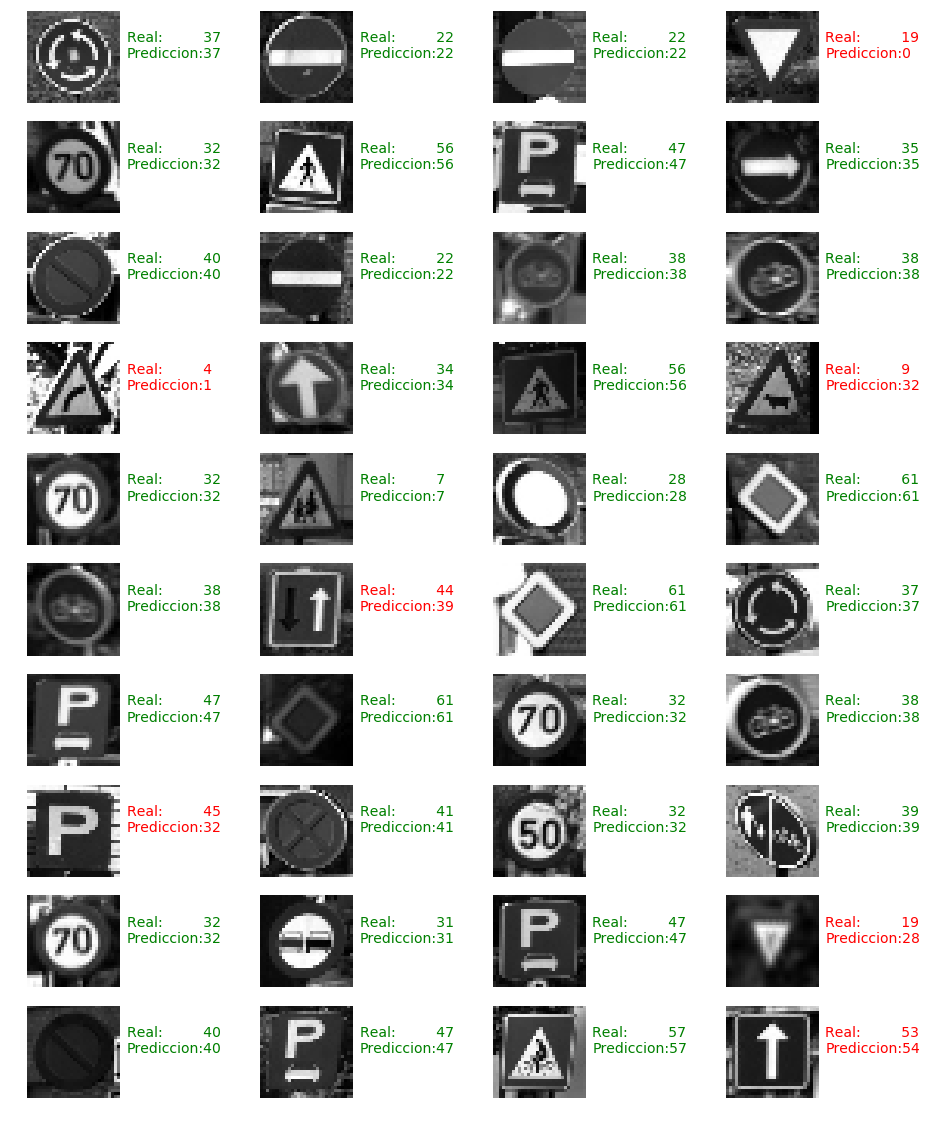

In [45]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [46]:
test_images, test_labels = load_ml_data(test_data_dir)

In [47]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [48]:
test_images30 = rgb2gray(np.array(test_images30))

In [49]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [50]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1603

In [51]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 63.61


## Alternativa a red neuronal 

In [57]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(30,30))) #capa de aplanado que recibe 900 pixeles 30*30 c/u de las imagenes
model.add(tf.keras.layers.Dense(units=130, activation="relu")) #activador relu, 130 neuronas
model.add(tf.keras.layers.Dense(units=256, activation="sigmoid"))#nueva capa para mejorar efectividad
model.add(tf.keras.layers.Dropout(0.2)) #capa DropOut, 20% NO aprende. Esto para mejorar su eficacia con datos diferentes a los de test
model.add(tf.keras.layers.Dense(units=62, activation='softmax'))
#capa de salida, 62 diferentes categorias

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [59]:

model.summary() #resumen de los datos de mi modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 130)               117130    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33536     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 166,600
Trainable params: 166,600
Non-trainable params: 0
_________________________________________________________________


In [62]:

#doy tamaño 30x30 a todas las imagenes de la carpeta de entrenamiento. las mas pequeñas las hara mas grandes
X_img_train30 = [transform.resize(image,(30,30)) for image in X_img_train]
X_img_train30[0]#los valores cambiaron --> ahora tiene 900 pixeles

NameError: name 'X_img_train' is not defined

In [61]:
X_img_train30 = np.array(X_img_train30) #tamaño y tipo de dato correcto para skimage

NameError: name 'X_img_train30' is not defined

In [60]:

model.fit(X_img_train30, Y_lbl_train, epochs=10)

NameError: name 'X_img_train30' is not defined